# Plot Reports for Binary Classification problem example


## Imports

In [1]:
import pandas as pd
import os
import requests
import numpy as np
import yaml
import logging
from sklearn.metrics import roc_auc_score
from crosspredict.iterator import Iterator
from crosspredict.crossval import CrossLightgbmModel
from crosspredict.target_encoder import CrossTargetEncoder, TargetEncoder
from category_encoders import WOEEncoder
from crosspredict.report_binary import ReportBinary, RocAucCurve
from sklearn.metrics import RocCurveDisplay
logging.basicConfig(level=logging.INFO)

## Load data

In [2]:
df_retro_rko2 = pd.read_csv('../tests/df_rko_2_0_hash.csv')
df = pd.read_pickle('../tests/bvo_ul_hash.pkl',compression='bz2')
df_retro_rko1 = pd.read_pickle('../tests/bvo_retro_ul_rko1_hash.pkl',compression='bz2')

df = pd.merge(df,df_retro_rko1, how='left',on=['c_date_op','inn_hash'])
df = pd.merge(df,df_retro_rko2[['inn_hash','inn_len','c_date_op','result_egr_to_one']], how='left',on=['c_date_op','inn_hash'])

In [3]:
df['first_dt_no_comm'] = pd.to_datetime(df['first_dt_no_comm'])
df['first_dt_no_comm_mon'] = df['first_dt_no_comm'].map(lambda x: x.replace(day=1))

In [4]:
df[:3]

,target,first_dt_no_comm,type,c_date_op,inn_hash,valid_egr,valid_eks,features_date,label,probability,inn_len,result_egr_to_one,first_dt_no_comm_mon
0,0,2018-02-22,train,2018-02-16,7fee310d762700c829831ce570f9237a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01
1,0,2018-09-26,train,2018-09-06,c1b47f82b2f9cfb68d58a523fbc7d47e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-01
2,0,2018-10-25,test,2018-10-16,814ca6c4a0babd9c45015040cfc60b16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-01


## Reports

### Precalculate metrics

We can to calculate metrics for several different models and compare them. (example: `cols_score=['result_egr_to_one','probability']`)  
We can compare models for different definition of true labels - just pass all necessary column names with true labels in `cols_target` (example: `cols_target=['target']`)  
We can pass `col_generation_deals` to plot "GINI by generation" (example: `col_generation_deals='first_dt_no_comm_mon'`)

In [5]:
a = ReportBinary(cols_score = ['result_egr_to_one','probability'], 
                 cols_target=['target'],
                 col_generation_deals='first_dt_no_comm_mon'
                )
a.fit(df) #precalculates all metrics

### Generate Figure and save it

To plot all report you need to pass `report_shape` and Dict with reports location according to plt.subplot2grid. Read more:  
https://matplotlib.org/3.1.1/gallery/userdemo/demo_gridspec01.html#sphx-glr-gallery-userdemo-demo-gridspec01-py  
Keys for `report` dict attribute can be
1. 'roc-auc'
2. 'precision-recall'
3. 'mean-prob'
4. 'gen-gini'
5. 'distribution'

Also you can pass sublists of `cols_score` and `cols_target` if you do not need to plot reports for all models/true labels


Example:  
```python
report_shape = (4,2),
report={'roc-auc':  {'loc':(0, 0)},
      'precision-recall': [{'loc':(0, 1)}],
      'mean-prob': [{'loc':(1, 0)},{'loc':(1, 1)}],
      'gen-gini': {'loc':(2,0), 'colspan':2},
      'distribution': [{'loc':(3,0)},{'loc':(3,1)}]
     }
```
Example:  
```python
report_shape = (3,2),
report={'roc-auc':  {'loc':(0, 0)},
      'precision-recall': {'loc':(0, 1)},
      'mean-prob': {'loc':(1, 0)},
      'gen-gini': [{'loc':(2,0), 'colspan':2}],
      'distribution': {'loc':(1,1)}
     },
cols_score=['probability']
 ```

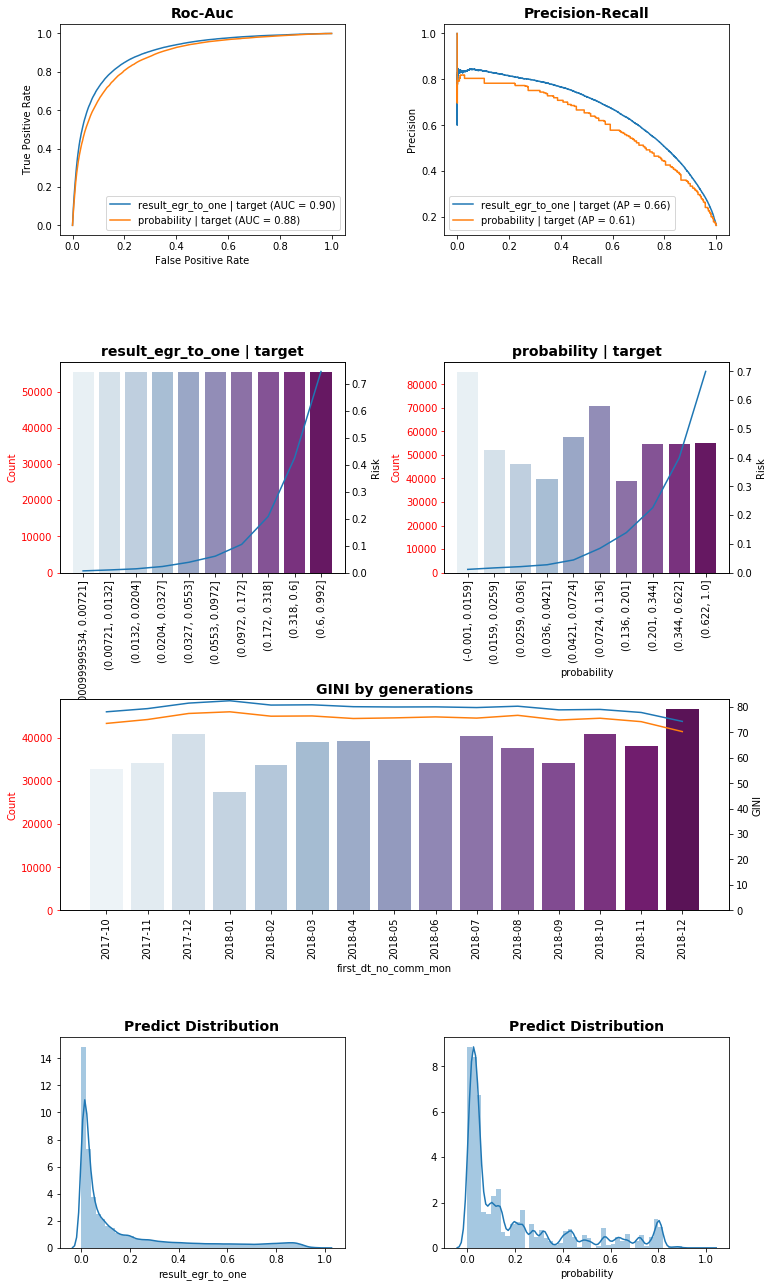

In [6]:
a.plot_report(report_shape = (4,2),
              report={'roc-auc':  {'loc':(0, 0)},
                      'precision-recall': [{'loc':(0, 1)}],
                      'mean-prob': [{'loc':(1, 0)},{'loc':(1, 1)}],
                      'gen-gini': {'loc':(2,0), 'colspan':2},
                      'distribution': [{'loc':(3,0)},{'loc':(3,1)}]
                     }
             )

In [7]:
a.fig.savefig('report1.png')

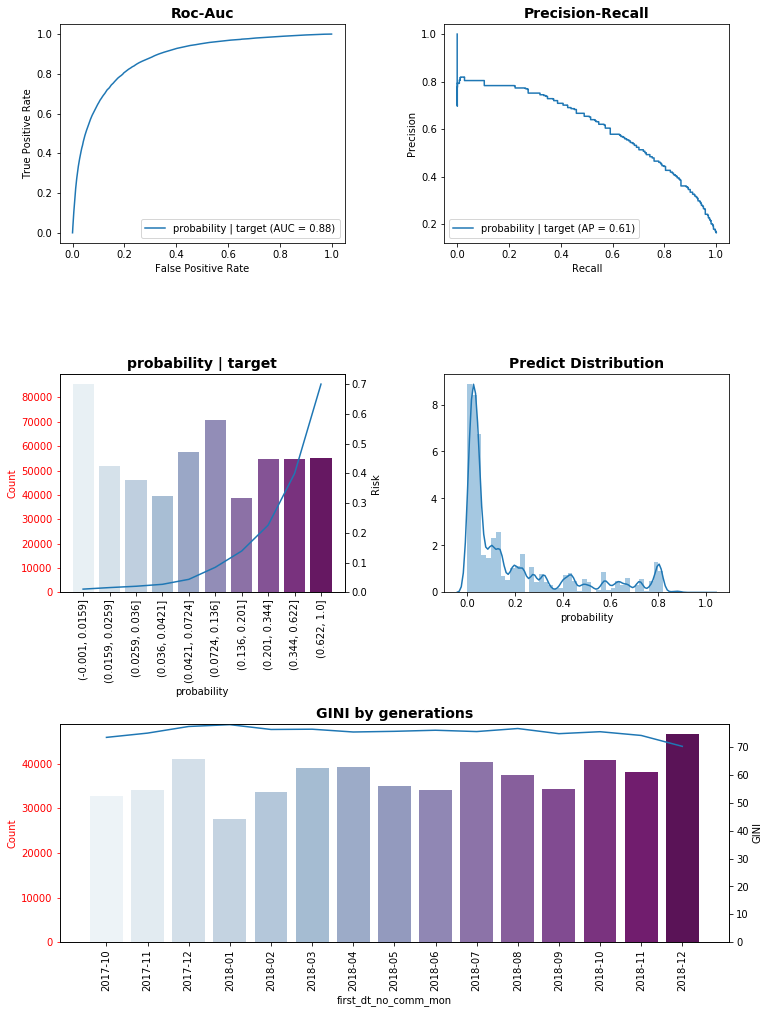

In [8]:
a.plot_report(report_shape = (3,2),
              report={'roc-auc':  {'loc':(0, 0)},
                      'precision-recall': {'loc':(0, 1)},
                      'mean-prob': {'loc':(1, 0)},
                      'gen-gini': [{'loc':(2,0), 'colspan':2}],
                      'distribution': {'loc':(1,1)}
                     },
              cols_score=['probability']) 

In [9]:
a.fig.savefig('report2.png')